### HR Analytics Project- Understanding the Attrition in HR
Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('HR Analytics Attrition.csv')

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.shape

(1470, 35)

In [6]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [8]:
data['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [9]:
data['DailyRate'].unique()

array([1102,  279, 1373, 1392,  591, 1005, 1324, 1358,  216, 1299,  809,
        153,  670, 1346,  103, 1389,  334, 1123, 1219,  371,  673, 1218,
        419,  391,  699, 1282, 1125,  691,  477,  705,  924, 1459,  125,
        895,  813, 1273,  869,  890,  852, 1141,  464, 1240, 1357,  994,
        721, 1360, 1065,  408, 1211, 1229,  626, 1434, 1488, 1097, 1443,
        515,  853, 1142,  655, 1115,  427,  653,  989, 1435, 1223,  836,
       1195, 1339,  664,  318, 1225, 1328, 1082,  548,  132,  746,  776,
        193,  397,  945, 1214,  111,  573, 1153, 1400,  541,  432,  288,
        669,  530,  632, 1334,  638, 1093, 1217, 1353,  120,  682,  489,
        807,  827,  871,  665, 1040, 1420,  240, 1280,  534, 1456,  658,
        142, 1127, 1031, 1189, 1354, 1467,  922,  394, 1312,  750,  441,
        684,  249,  841,  147,  528,  594,  470,  957,  542,  802, 1355,
       1150, 1329,  959, 1033, 1316,  364,  438,  689,  201, 1427,  857,
        933, 1181, 1395,  662, 1436,  194,  967, 14

In [10]:
data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [11]:
data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [12]:
data['DistanceFromHome'].unique()

array([ 1,  8,  2,  3, 24, 23, 27, 16, 15, 26, 19, 21,  5, 11,  9,  7,  6,
       10,  4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13], dtype=int64)

In [13]:
data['Education'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

In [14]:
data['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [15]:
data['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [16]:
data['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [17]:
data['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [19]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [20]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [21]:
data['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [22]:
data['Over18'].unique()

array(['Y'], dtype=object)

In [23]:
data['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
data['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

#### Oridinal encoding -
- Attrition
- Business Travel
- Department
- Education field
- JobRole
- MartialStatus
- Over18
- OverTime

#### getdummies - 
- Gender

#### Encoding

In [25]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
list1 = ['Attrition','BusinessTravel','Department','EducationField','JobRole','MaritalStatus','Over18','OverTime']
def ordinal_encode(df,column):
  data[column]=oe.fit_transform(data[column])
  return df

In [26]:
data=ordinal_encode(data,['Attrition','BusinessTravel','Department','EducationField','JobRole','MaritalStatus','Over18','OverTime'])

In [27]:
### get dummies
data = pd.get_dummies(data)

In [28]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Female,Gender_Male
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,1,...,0,8,0,1,6,4,0,5,1,0
1,49,0.0,1.0,279,1.0,8,1,1.0,1,2,...,1,10,3,3,10,7,1,7,0,1
2,37,1.0,2.0,1373,1.0,2,2,4.0,1,4,...,0,7,3,3,0,0,0,0,0,1
3,33,0.0,1.0,1392,1.0,3,4,1.0,1,5,...,0,8,3,3,8,7,3,0,1,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,7,...,1,6,3,3,2,2,2,2,0,1


In [29]:
data.shape

(1470, 36)

##### SMOTE will be use for imbalancing of data

### EDA(Exploratory data analysis)

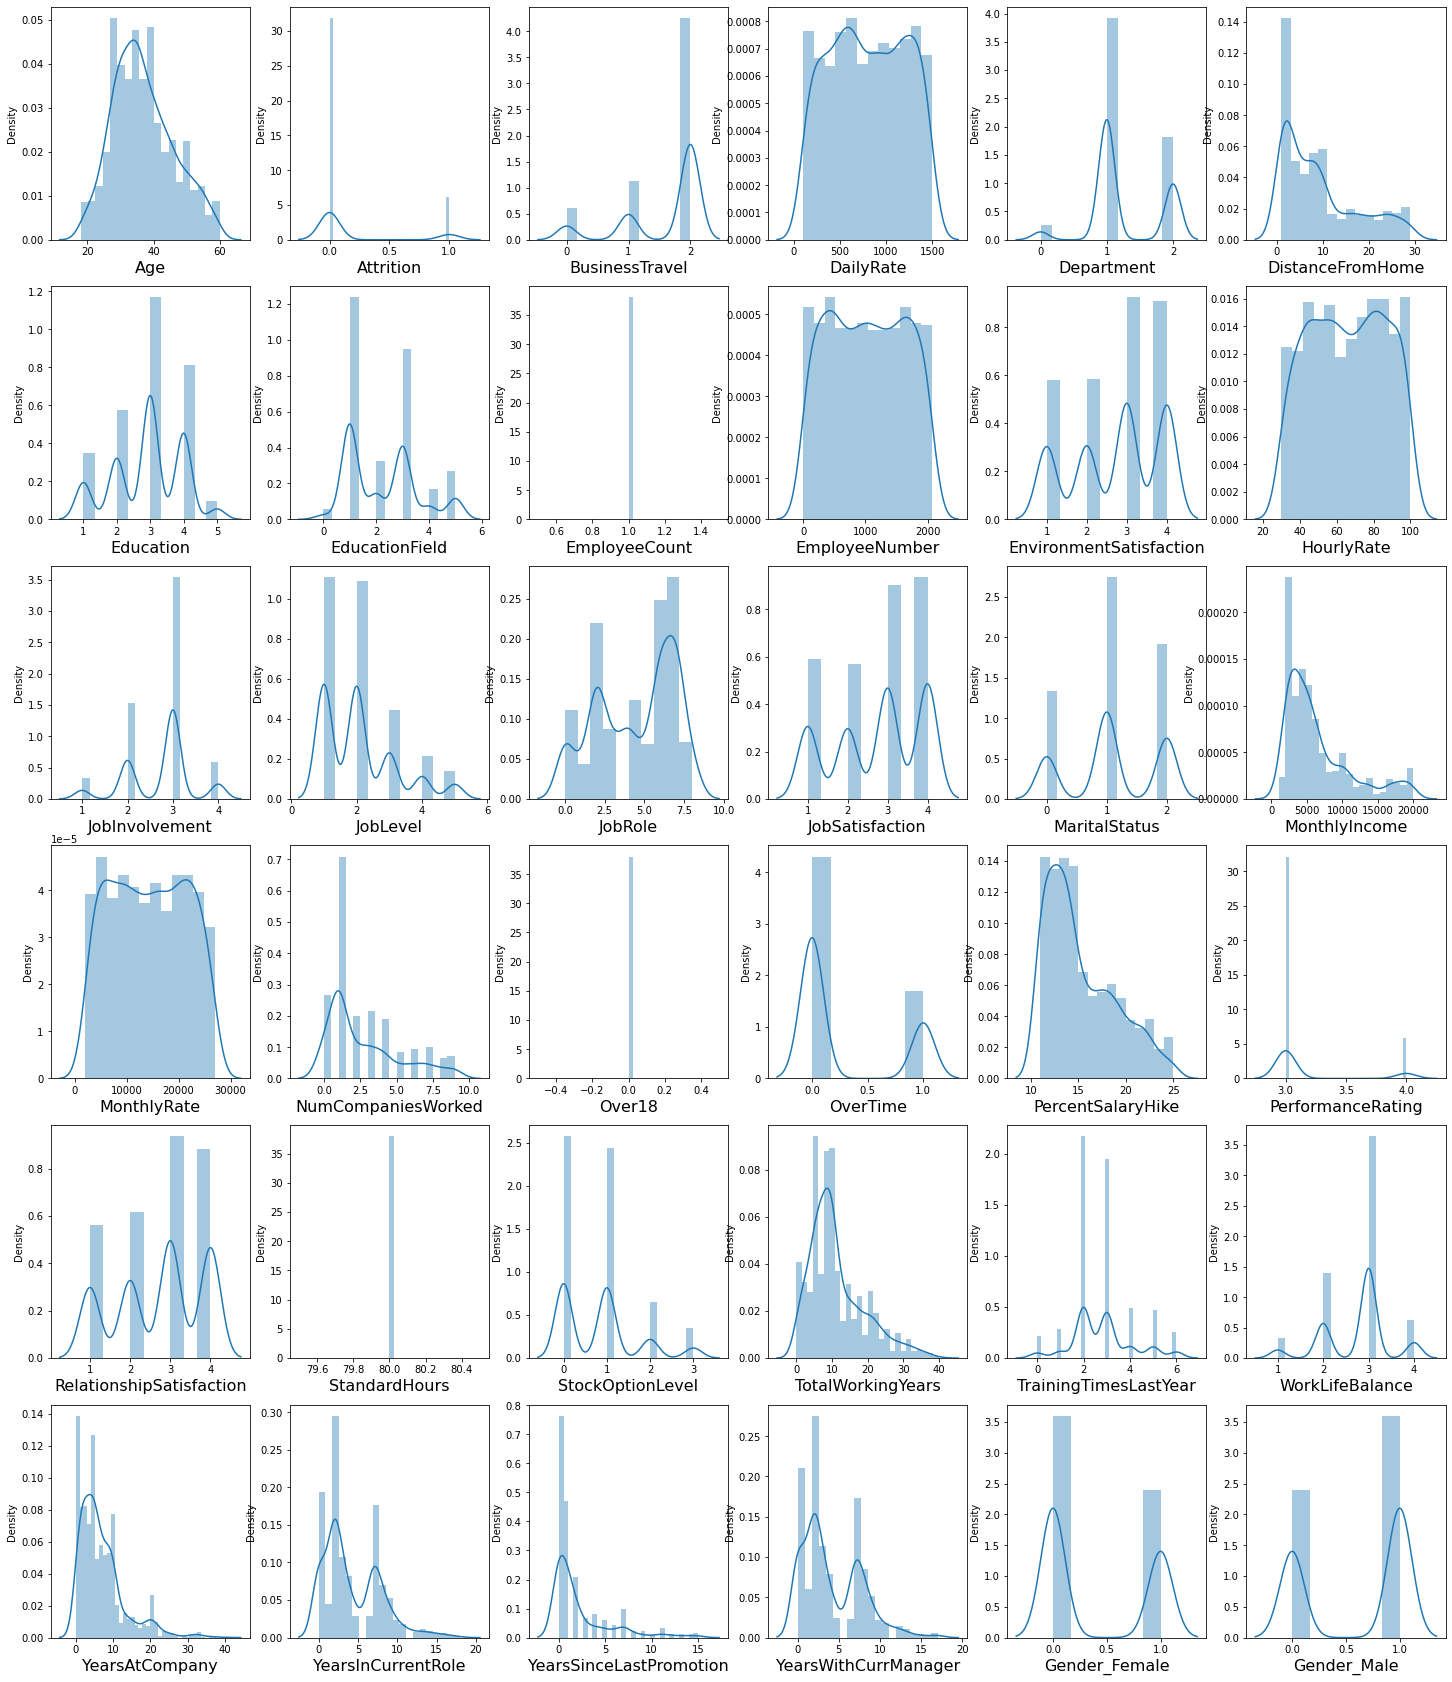

In [30]:
plt.figure(figsize=(25,30))
plotnumber=1

for column in data:
    if plotnumber<=36: #as there are 36 columns in data
        ax=plt.subplot(6,6,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=16)
    plotnumber +=1
plt.show()

#### skewed columns- 
- Age
- DailyRate
- DistanceFromHome
- HourlyRate
- JobRole
- MonthlyIncome
- MonthlyRate
- PercentageSalaryHike
- TotalWorkingYears
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

which are also continues in nature

In [31]:
abs(data.corr()['Attrition']).sort_values(ascending=True)

BusinessTravel              0.000074
PerformanceRating           0.002889
HourlyRate                  0.006846
EmployeeNumber              0.010577
PercentSalaryHike           0.013478
MonthlyRate                 0.015170
EducationField              0.026846
Gender_Male                 0.029453
Gender_Female               0.029453
Education                   0.031373
YearsSinceLastPromotion     0.033019
NumCompaniesWorked          0.043494
RelationshipSatisfaction    0.045872
DailyRate                   0.056652
TrainingTimesLastYear       0.059478
WorkLifeBalance             0.063939
Department                  0.063991
JobRole                     0.067151
DistanceFromHome            0.077924
EnvironmentSatisfaction     0.103369
JobSatisfaction             0.103481
JobInvolvement              0.130016
YearsAtCompany              0.134392
StockOptionLevel            0.137145
YearsWithCurrManager        0.156199
Age                         0.159205
MonthlyIncome               0.159840
Y

In [32]:
data['EmployeeCount']

0       1
1       1
2       1
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: EmployeeCount, Length: 1470, dtype: int64

In [33]:
data['Over18']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1465    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: Over18, Length: 1470, dtype: float64

In [34]:
data['StandardHours']

0       80
1       80
2       80
3       80
4       80
        ..
1465    80
1466    80
1467    80
1468    80
1469    80
Name: StandardHours, Length: 1470, dtype: int64

### will drop these 3 columns in furthur steps

<AxesSubplot:title={'center':'Correlation with Attrition'}>

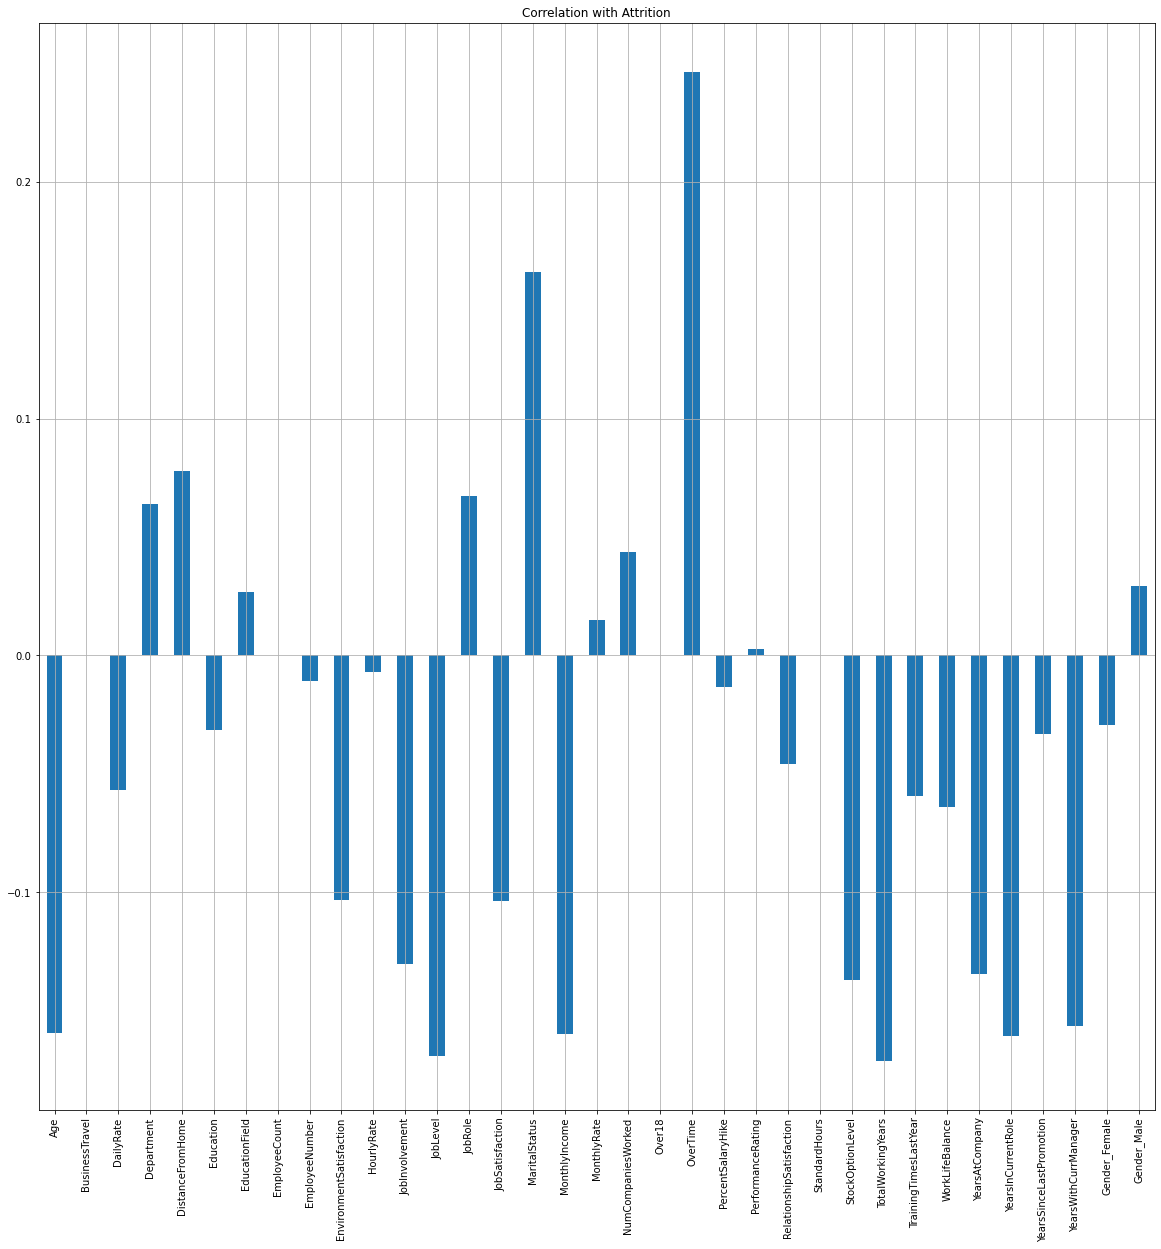

In [35]:
# visualize the correlation
data.drop('Attrition', axis =1).corrwith(data['Attrition']).plot(kind ='bar',grid = True, figsize = (20,20),
                                                   title = 'Correlation with Attrition')

#### checking for outliers

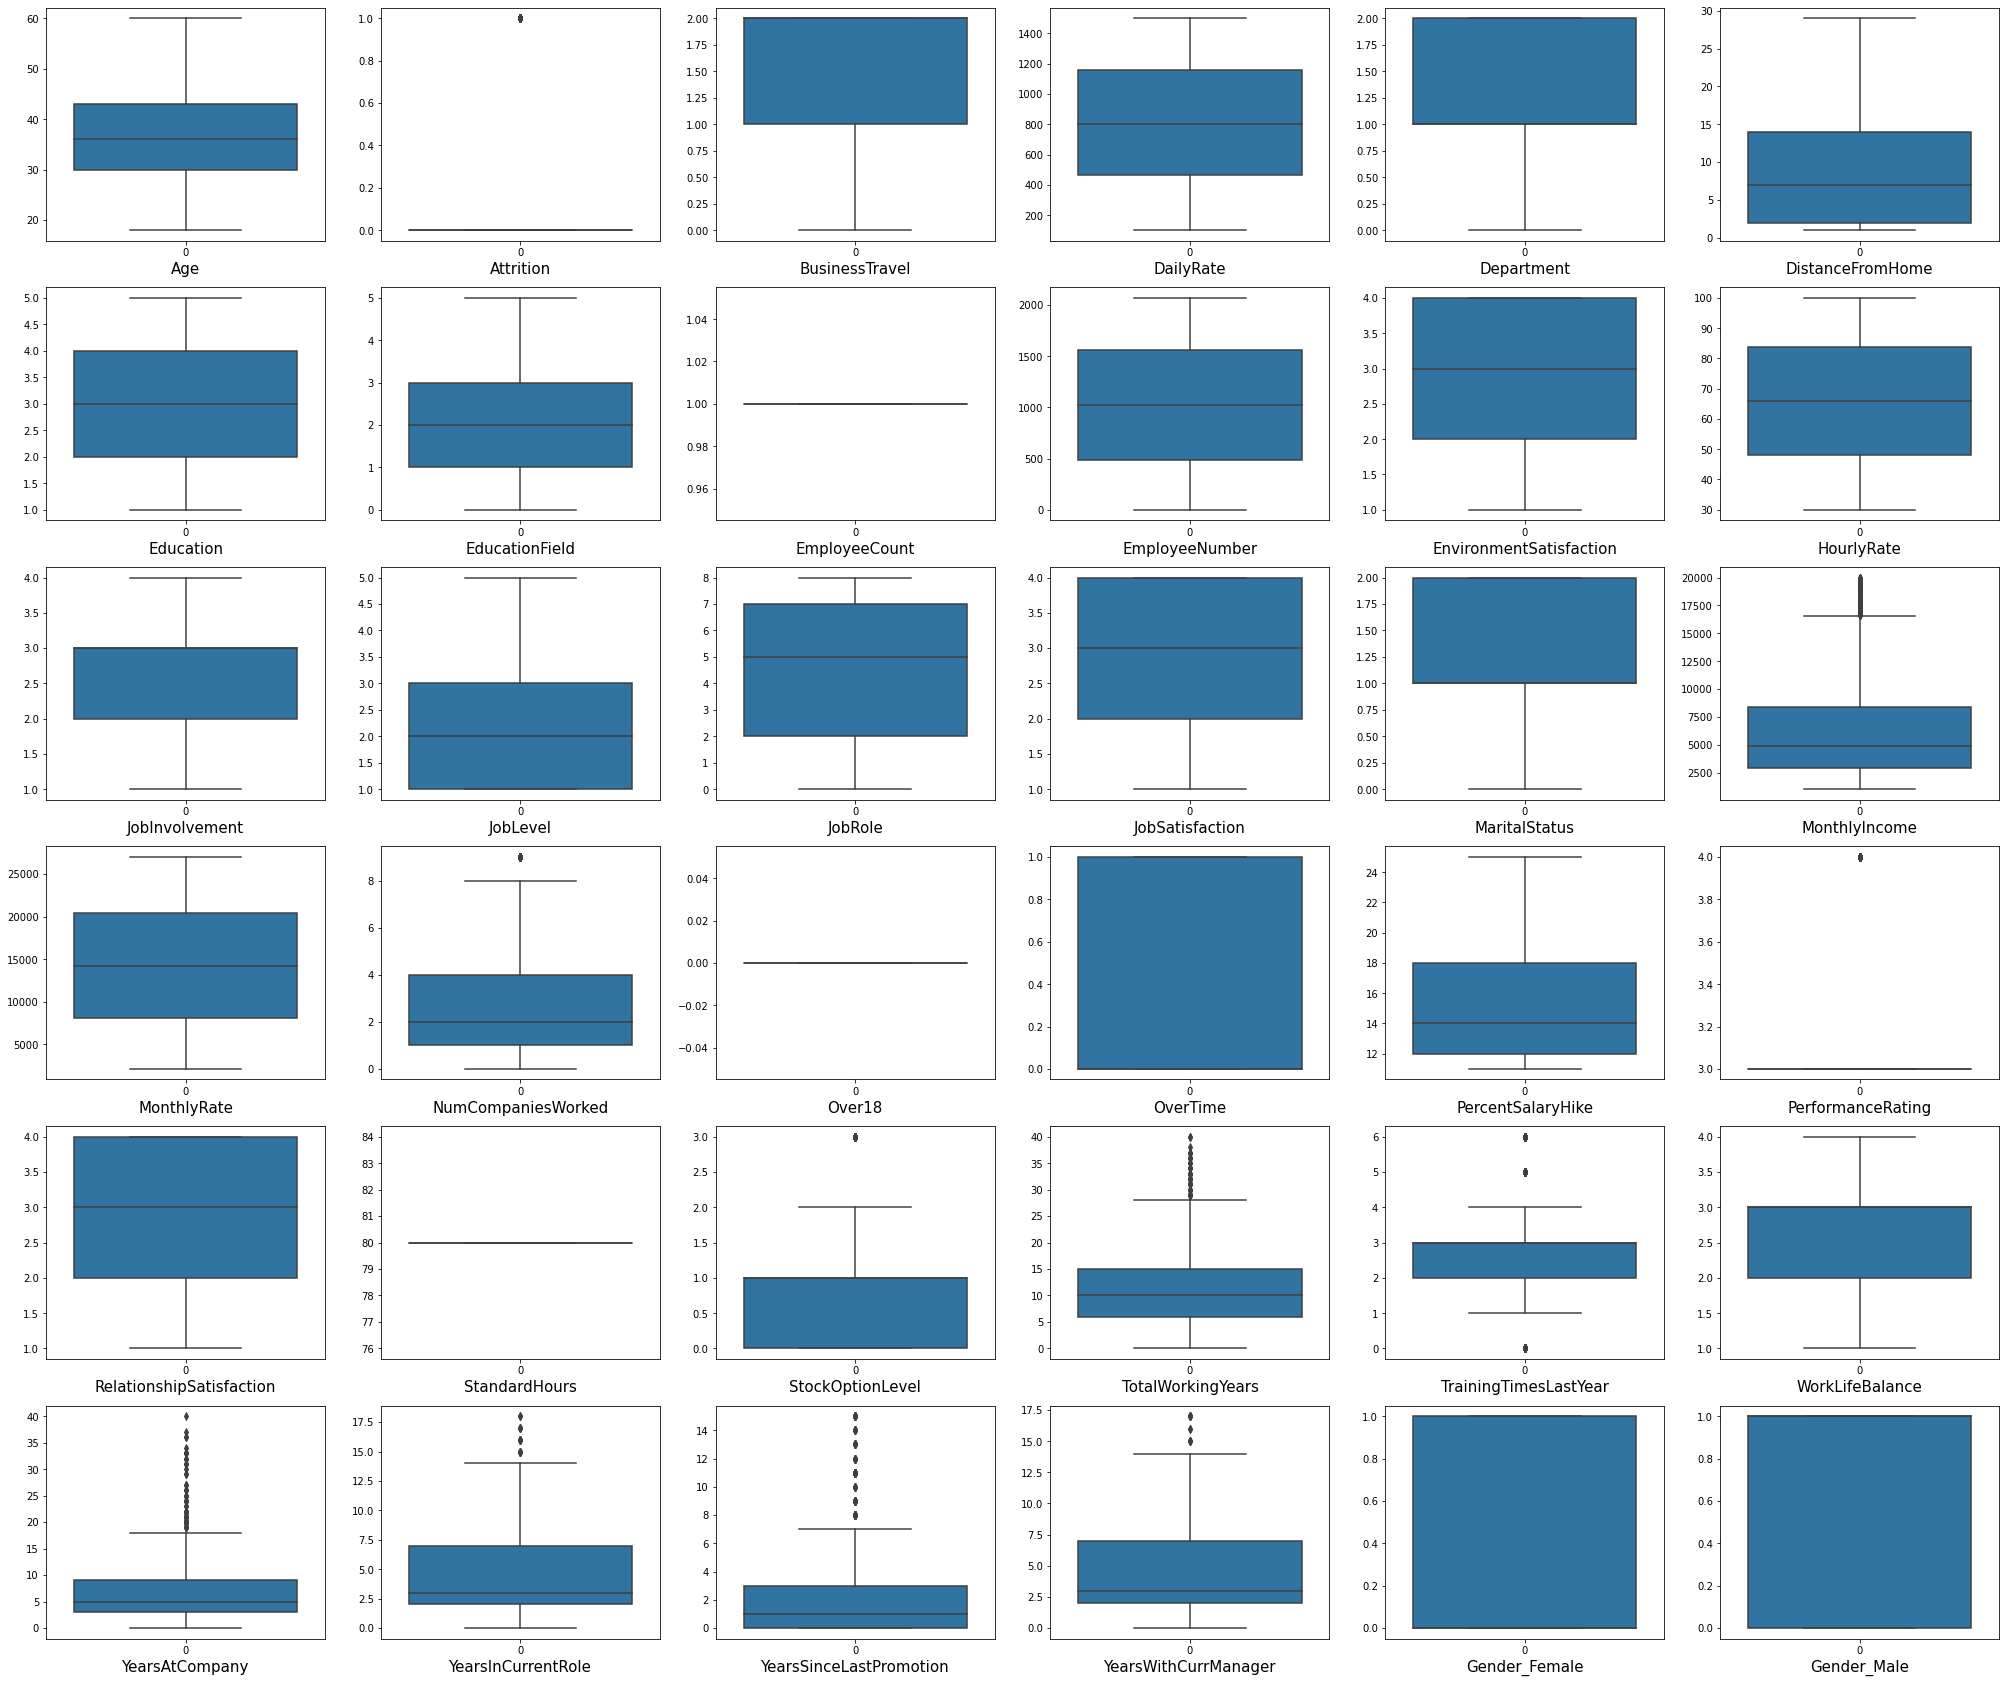

In [36]:
plt.figure(figsize=(35,30))
graph=1

for column in data:
    if graph<=36:
        ax=plt.subplot(6,6,graph)
        sns.boxplot(data = data[column],orient="v")
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

### outliers removal from - 
- MonthlyIncome
- TotalWorkingYears
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

<function matplotlib.pyplot.show(close=None, block=None)>

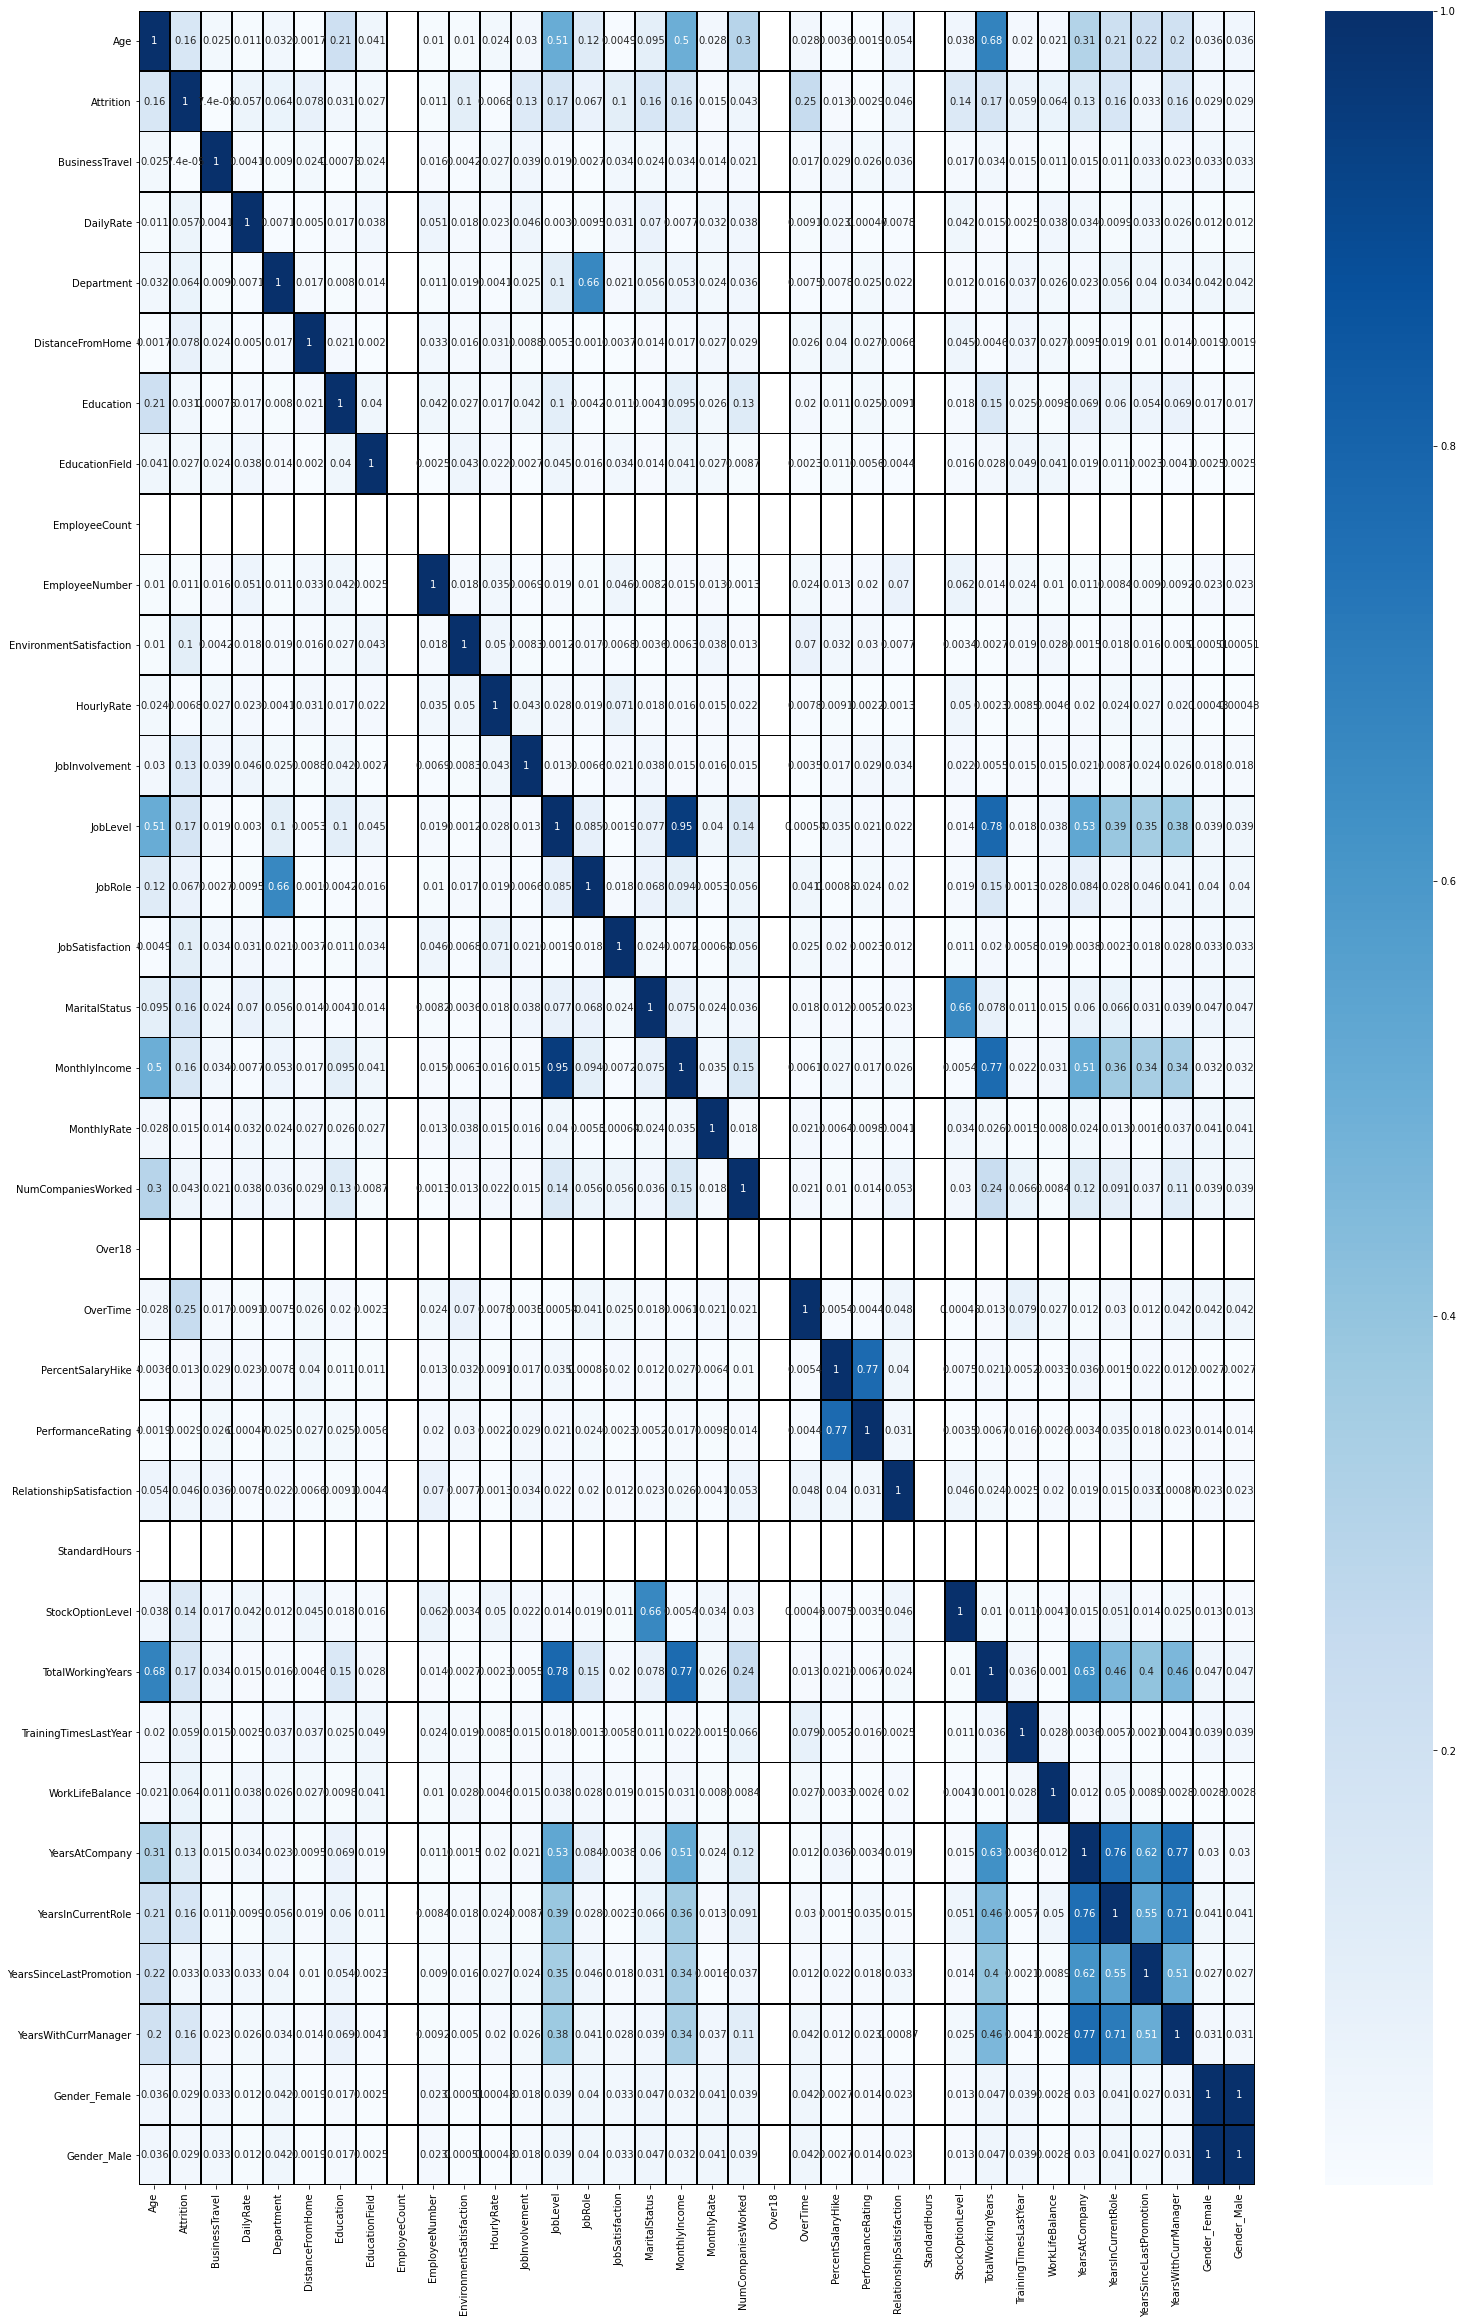

In [37]:
### heatmap
### plotting heatmap
plt.figure(figsize=(25,40))
sns.heatmap(abs(data.corr()),annot=True,cmap='Blues',linecolor='black',linewidths=0.5)
plt.show

### checking trends and vif for multicollinearity in,
- YearsInCurrentRole and YearsAtCompany
- YearsWithCurrManager and YearsAtCompany
- YearsInCurrentRole and YearsWithCurrManager

### Multivariate analyis

<AxesSubplot:xlabel='YearsAtCompany', ylabel='YearsInCurrentRole'>

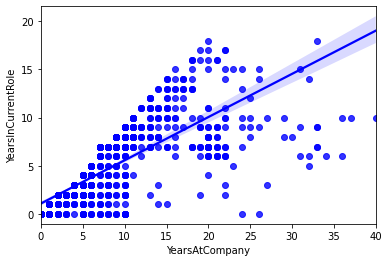

In [38]:
sns.regplot(y='YearsInCurrentRole',x='YearsAtCompany',data=data,color='Blue')

<AxesSubplot:xlabel='YearsAtCompany', ylabel='YearsWithCurrManager'>

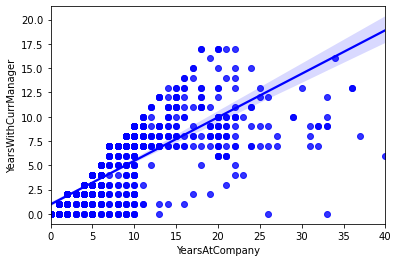

In [39]:
sns.regplot(y='YearsWithCurrManager',x='YearsAtCompany',data=data,color='Blue')

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='YearsWithCurrManager'>

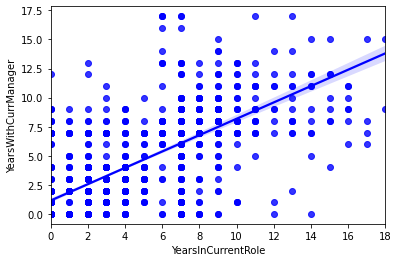

In [40]:
sns.regplot(y='YearsWithCurrManager',x='YearsInCurrentRole',data=data,color='Blue')

<AxesSubplot:xlabel='JobLevel', ylabel='TotalWorkingYears'>

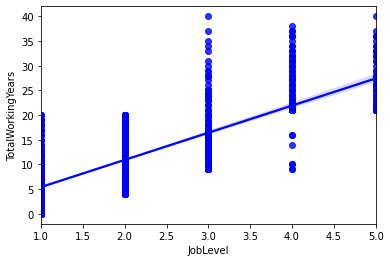

In [41]:
sns.regplot(y='TotalWorkingYears',x='JobLevel',data=data,color='Blue')

<AxesSubplot:xlabel='MonthlyIncome', ylabel='TotalWorkingYears'>

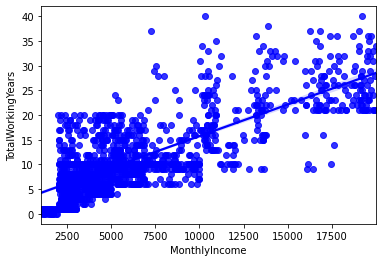

In [42]:
sns.regplot(y='TotalWorkingYears',x='MonthlyIncome',data=data,color='Blue')

<AxesSubplot:xlabel='PerformanceRating', ylabel='PercentSalaryHike'>

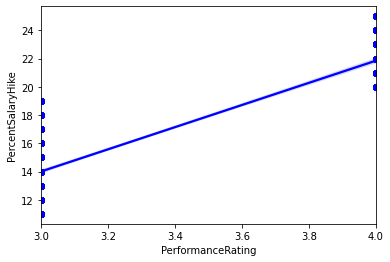

In [43]:
sns.regplot(y='PercentSalaryHike',x='PerformanceRating',data=data,color='Blue')

#### There can be seen the increasing trends we will cross check it by vif value,

#### Data preprocessing 
- data normalization - power transformer(skewness)
- outliers removed - percentile method
- Vif value for multicolinearity
- PCA

#### droping unnecessary features

In [44]:
data.drop(columns=['EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)

In [45]:
data.shape

(1470, 33)

In [46]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Gender_Female', 'Gender_Male'],
      dtype='object')

### outliers removal from - 
- MonthlyIncome
- TotalWorkingYears
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

### Replacing outliers with percentile method so we dont loose data

In [47]:
def preporcessing(data):
  data=data.copy()
  X=data.drop('Attrition',axis=1)
  y=data['Attrition']
  return X,y

In [48]:
X,y=preporcessing(data)

In [49]:
for col in X.columns:
  percentile=X[col].quantile([0.01,0.98]).values
  X[col][X[col]<=percentile[0]]=percentile[0]
  X[col][X[col]>=percentile[1]]=percentile[1]

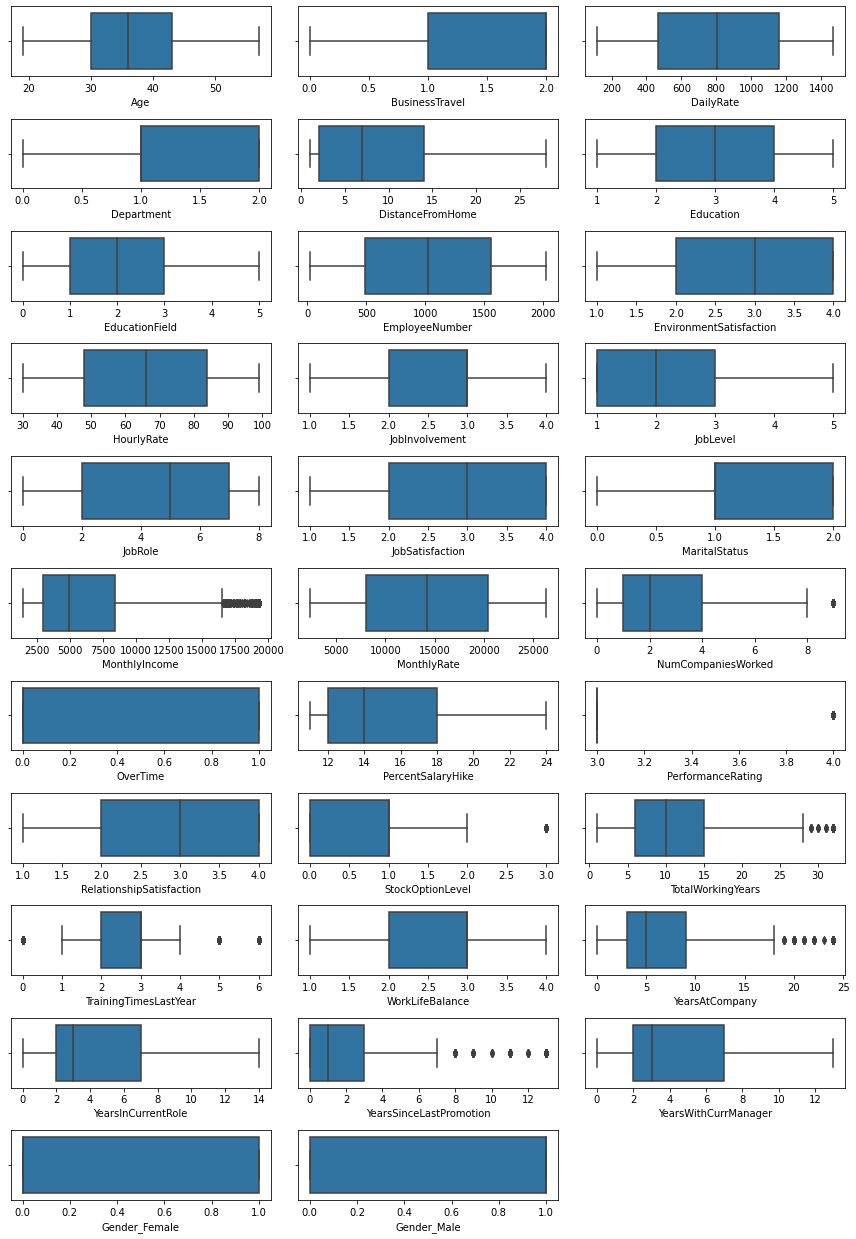

In [50]:
X_out=X.columns.values
plt.figure(figsize=(12,20))
for i in range(0,len(X_out)):
  plt.subplot(13,3,i+1)
  sns.boxplot(X[X_out[i]])
  plt.tight_layout()

In [51]:
x=X

In [52]:
from sklearn.preprocessing import power_transform
X_new=power_transform(X,method='yeo-johnson')
X_new=pd.DataFrame(X_new,columns=x.columns)

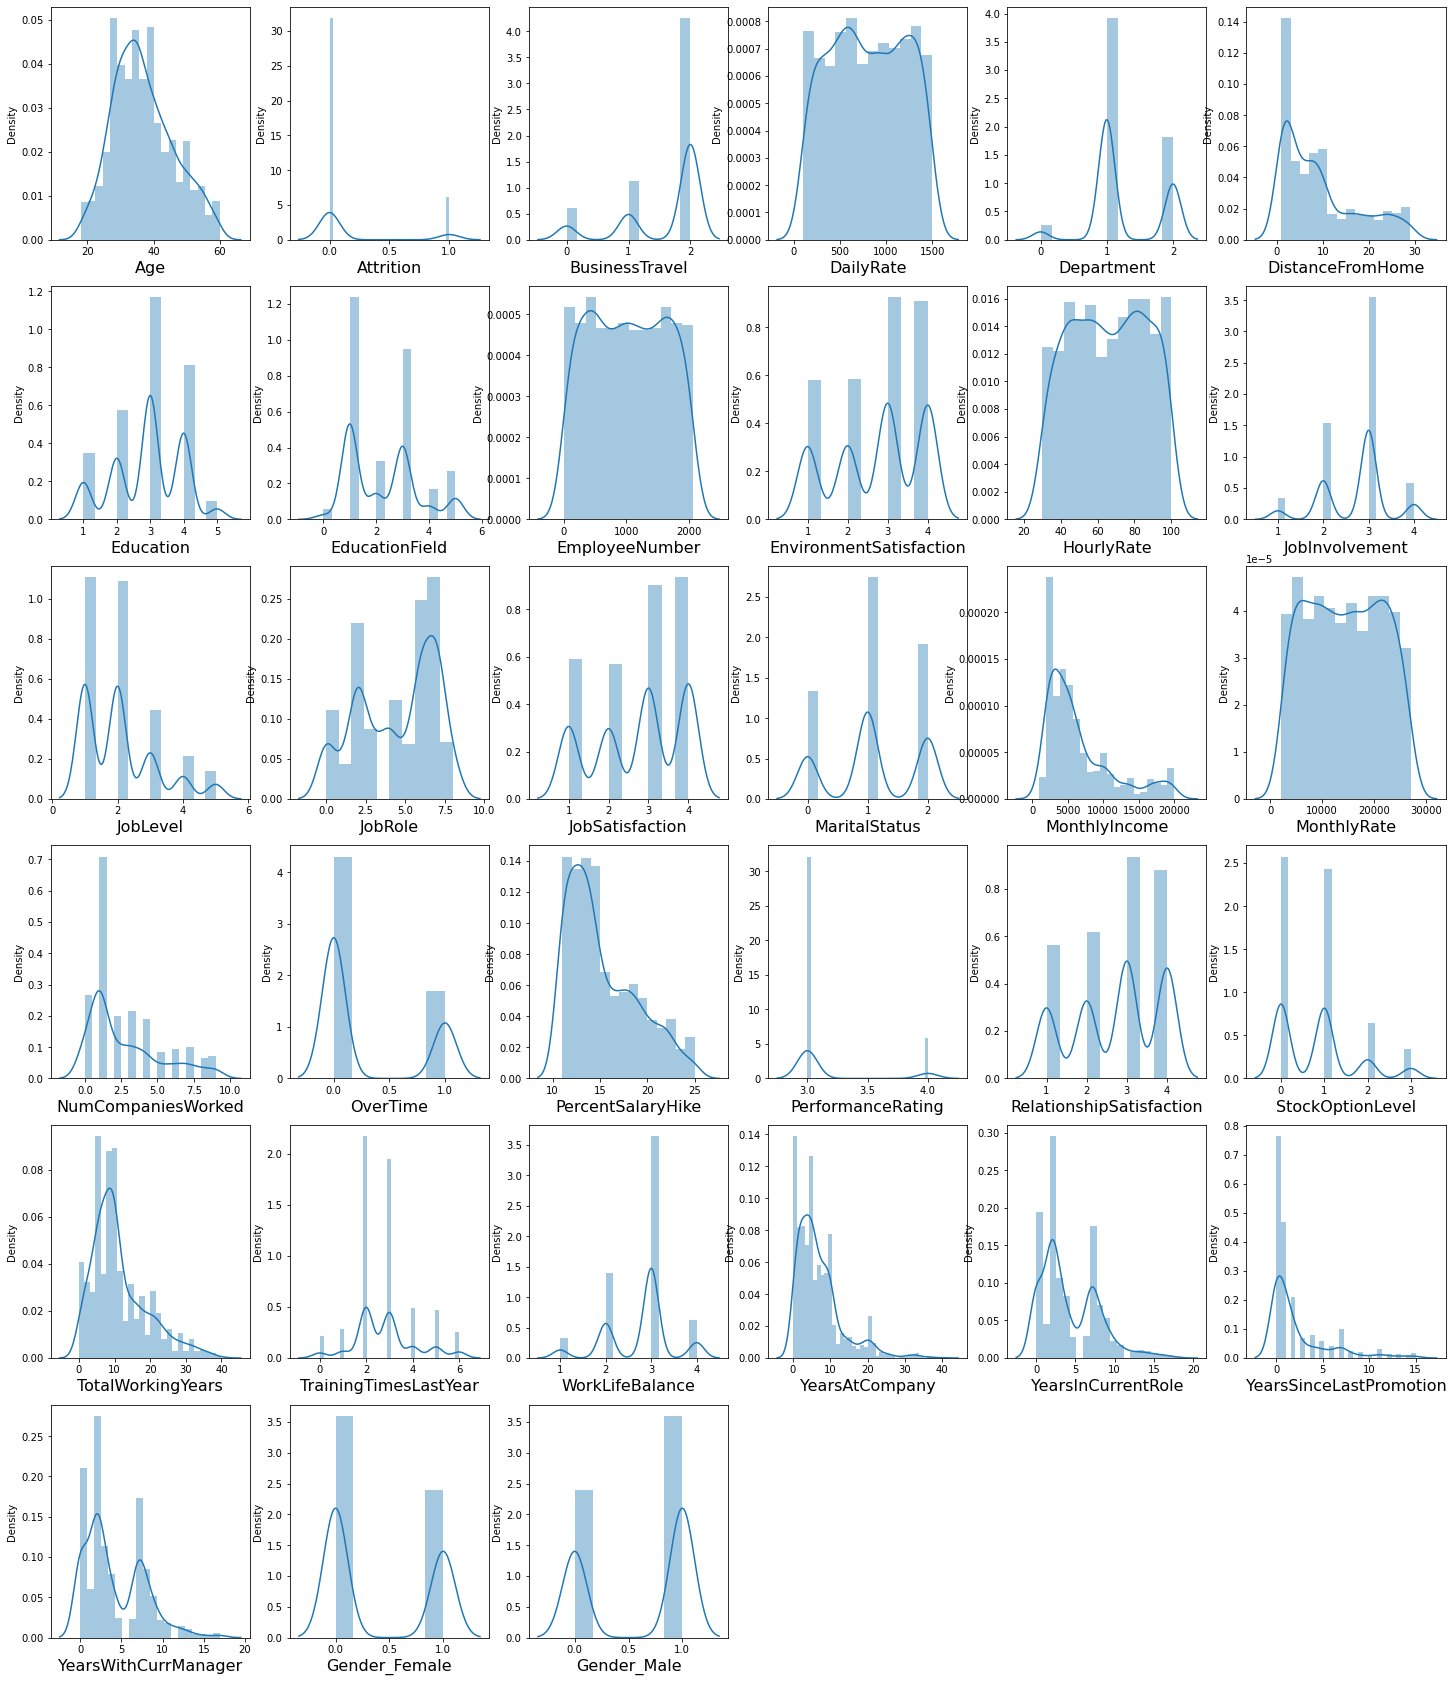

In [53]:
plt.figure(figsize=(25,30))
plotnumber=1

for column in data:
    if plotnumber<=36: #as there are 36 columns in data
        ax=plt.subplot(6,6,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=16)
    plotnumber +=1
plt.show()

In [54]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X_new,y)
X_new=pd.DataFrame(X_res,columns=x.columns)
y_new=pd.DataFrame(y_res,columns=['Attrition'])

Text(0.5, 1.0, 'Balanced data')

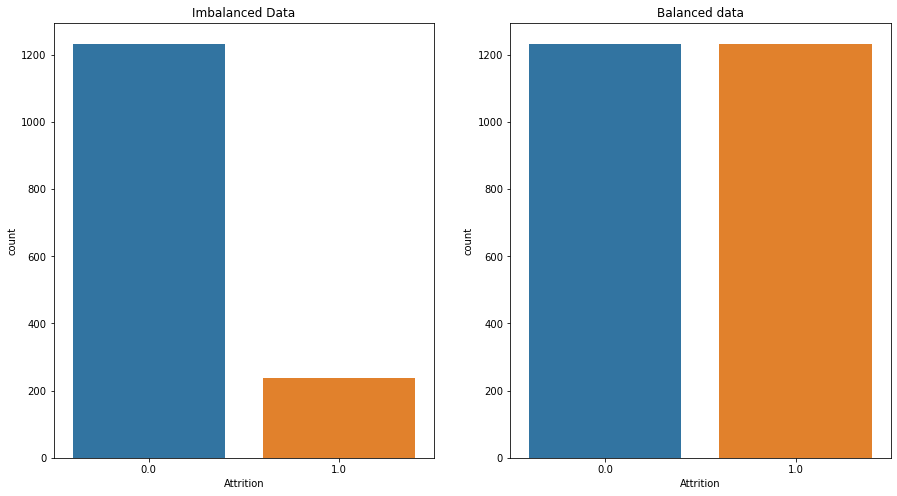

In [55]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(data['Attrition'])
plt.title("Imbalanced Data")
plt.subplot(1,2,2)
sns.countplot(y_new['Attrition'])
plt.title("Balanced data")

### Data Standardization and checking vif value

In [56]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Female,Gender_Male
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,2,...,0,8,0,1,6,4,0,5,1,0
1,49,0.0,1.0,279,1.0,8,1,1.0,2,3,...,1,10,3,3,10,7,1,7,0,1
2,37,1.0,2.0,1373,1.0,2,2,4.0,4,4,...,0,7,3,3,0,0,0,0,0,1
3,33,0.0,1.0,1392,1.0,3,4,1.0,5,4,...,0,8,3,3,8,7,3,0,1,0
4,27,0.0,2.0,591,1.0,2,1,3.0,7,1,...,1,6,3,3,2,2,2,2,0,1


In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_new=scaler.fit_transform(X_new)
X_new=pd.DataFrame(X_new,columns=(x.columns))

#### MODEL TRAINING

In [58]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [59]:
for i in range(500,1000):
    x_train,x_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.20,random_state = i)
    LR.fit(x_train,y_train)
    pred_train = LR.predict(x_train) 
    pred_test = LR.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1) == round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"model perform very well")
        print("At random state",i)
        print('Training accuracy score is',accuracy_score(y_train,pred_train)*100)
        print('Testing accuracy score is',accuracy_score(y_test,pred_test)*100)

At random state 678 model perform very well
At random state 678
Training accuracy score is 80.02028397565924
Testing accuracy score is 79.95951417004049
At random state 693 model perform very well
At random state 693
Training accuracy score is 78.90466531440163
Testing accuracy score is 78.94736842105263
At random state 696 model perform very well
At random state 696
Training accuracy score is 79.61460446247465
Testing accuracy score is 79.55465587044534
At random state 880 model perform very well
At random state 880
Training accuracy score is 79.56389452332657
Testing accuracy score is 79.55465587044534
At random state 886 model perform very well
At random state 886
Training accuracy score is 78.85395537525355
Testing accuracy score is 78.94736842105263
At random state 930 model perform very well
At random state 930
Training accuracy score is 79.10750507099391
Testing accuracy score is 79.1497975708502


### selecting random state = 678

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.20,random_state=678)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(classification_report(y_test,pred))
print('Confusion matrix\n',confusion_matrix(y_test,pred))

79.95951417004049
              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79       237
         1.0       0.81      0.80      0.81       257

    accuracy                           0.80       494
   macro avg       0.80      0.80      0.80       494
weighted avg       0.80      0.80      0.80       494

Confusion matrix
 [[189  48]
 [ 51 206]]


### Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
print(accuracy_score(y_test,pred_dt)*100)
print(classification_report(y_test,pred_dt))
print('Confusion matrix\n',confusion_matrix(y_test,pred_dt))

83.80566801619433
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83       237
         1.0       0.86      0.83      0.84       257

    accuracy                           0.84       494
   macro avg       0.84      0.84      0.84       494
weighted avg       0.84      0.84      0.84       494

Confusion matrix
 [[201  36]
 [ 44 213]]


### Random forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
print(accuracy_score(y_test,pred_rf)*100)
print(classification_report(y_test,pred_rf))
print('Confusion matrix\n',confusion_matrix(y_test,pred_rf))

92.71255060728745
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       237
         1.0       0.97      0.88      0.93       257

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494

Confusion matrix
 [[231   6]
 [ 30 227]]


### Gradient Boosting 

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred_gb = gb.predict(x_test)
print(accuracy_score(y_test,pred_gb)*100)
print(classification_report(y_test,pred_gb))
print('Confusion matrix\n',confusion_matrix(y_test,pred_gb))

90.68825910931174
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       237
         1.0       0.95      0.86      0.91       257

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494

Confusion matrix
 [[226  11]
 [ 35 222]]


### Xtreme gradient boosting

In [65]:
from xgboost import XGBClassifier
xgbt = XGBClassifier()
xgbt.fit(x_train,y_train)
pred_xgbt = xgbt.predict(x_test)
print(accuracy_score(y_test,pred_xgbt)*100)
print(classification_report(y_test,pred_xgbt))
print('Confusion matrix\n',confusion_matrix(y_test,pred_xgbt))

[10:23:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
90.68825910931174
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       237
         1.0       0.95      0.87      0.91       257

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494

Confusion matrix
 [[225  12]
 [ 34 223]]


### Support vector machine

In [66]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
print(accuracy_score(y_test,pred_svc)*100)
print(classification_report(y_test,pred_svc))
print('Confusion matrix\n',confusion_matrix(y_test,pred_svc))

93.52226720647774
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       237
         1.0       0.94      0.94      0.94       257

    accuracy                           0.94       494
   macro avg       0.94      0.94      0.94       494
weighted avg       0.94      0.94      0.94       494

Confusion matrix
 [[221  16]
 [ 16 241]]


In [67]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(LR, X, y, cv=5)
print("Cross validation score of logistic regression model is",scr.mean()*100)

Cross validation score of logistic regression model is 84.21768707482993


In [68]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(dt, X, y, cv=5)
print("Cross validation score of logistic regression model is",scr.mean()*100)

Cross validation score of logistic regression model is 77.68707482993197


In [69]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rf, X, y, cv=5)
print("Cross validation score of logistic regression model is",scr.mean()*100)

Cross validation score of logistic regression model is 85.64625850340136


In [70]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(gb, X, y, cv=5)
print("Cross validation score of logistic regression model is",scr.mean()*100)

Cross validation score of logistic regression model is 86.05442176870748


In [71]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(xgbt, X, y, cv=5)
print("Cross validation score of logistic regression model is",scr.mean()*100)

[10:23:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:23:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:23:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:23:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [72]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(svc, X, y, cv=5)
print("Cross validation score of logistic regression model is",scr.mean()*100)

Cross validation score of logistic regression model is 83.87755102040816


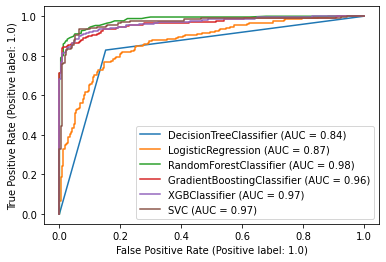

In [73]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(dt, x_test, y_test)
plot_roc_curve(LR, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)
plot_roc_curve(gb, x_test, y_test, ax = disp.ax_)
plot_roc_curve(xgbt, x_test, y_test, ax = disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax = disp.ax_)
plt.show()

## Hypertuning by gridsearchcv

### cross validation of xtreme boosting is best and Auc is also 0.97 so we will try to increase accuracy,

In [75]:
from sklearn.model_selection import GridSearchCV

X_train,x_test,Y_train,y_test = train_test_split(X_new,y_new,test_size=.20,random_state=0)
params = {'learning_rate':np.arange(0.2,0.4,0.1),
          'n_estimators':range(10,12),
        'max_depth':range(6,12),
         }
GCV2 = GridSearchCV(xgbt,param_grid = params)
GCV2.fit(X_train,Y_train)
print('best_pram', GCV2.best_params_)

rf=GCV2.best_estimator_ #reinstantiating with best params

rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

rf_confusion_mat = confusion_matrix(y_test,y_pred)

print('\nconfusion mat =>','\n',rf_confusion_mat )
print('\naccuracy_score =>','\n',accuracy_score(y_test,y_pred))

[10:29:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:29:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:29:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:29:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:29:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:29:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:29:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:29:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:29:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:29:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:29:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:29:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:29:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:29:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:29:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:29:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:29:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:29:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:29:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:29:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### best_pram {'learning_rate': 0.30000000000000004, 'max_depth': 6, 'n_estimators': 11}
confusion mat => 
 [[229   2]
 [ 16 247]]

accuracy_score => 
 0.9635627530364372

In [76]:
import joblib
joblib.dump(GCV2.best_estimator_,'HR Analytics.pkl')

['HR Analytics.pkl']

In [77]:
model=joblib.load("E:\Datatrained projects\Datatrained-projects\HR Analytics\HR Analytics.pkl")
y_preds=model.predict(x_test)
predicted=pd.DataFrame(y_preds,columns=['predicted'])
predicted

,predicted
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
489,0.0
490,1.0
491,1.0
492,1.0
